In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import boxcox, boxcox_normmax
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , Ridge , Lasso, RidgeCV
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.preprocessing import OneHotEncoder ,RobustScaler
from xgboost import XGBRegressor
import warnings


warnings.filterwarnings("ignore")

# Read the Data 

In [2]:
# read the data 
df=pd.read_csv("./archive/Clean_Dataset.csv")

In [3]:
# print the frist 10 rows 
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [4]:
# print the last 10 rows 
df.tail(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300143,300143,Air_India,AI-440,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.42,49,51345
300144,300144,Air_India,AI-539,Chennai,Evening,one,Morning,Hyderabad,Business,18.92,49,51345
300145,300145,Air_India,AI-430,Chennai,Morning,one,Morning,Hyderabad,Business,23.08,49,51345
300146,300146,Air_India,AI-440,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.83,49,51345
300147,300147,Air_India,AI-569,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.25,49,68739
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


# EDA

In [5]:
# print the shape of data 
df.shape

(300153, 12)

In [6]:
# drope the Unnamed: 0 	 column 
df.drop("Unnamed: 0",axis=1,inplace =True)

In [7]:
# print the shape of data
df.shape

(300153, 11)

In [8]:
# see th duplicated data 
df.duplicated().sum()

0

In [9]:
# calculate the number of the nan value 
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
# print the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


### from this we see that the column not have mising values and the data types for each column is corect 

In [11]:
# print the column of the data 
df.columns.tolist() 

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

# work with numerical data

In [12]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


<Axes: >

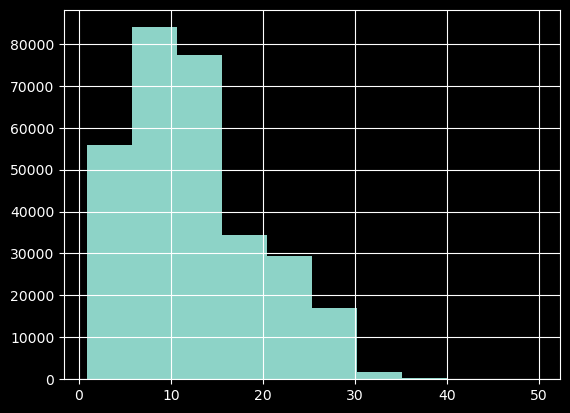

In [13]:
# plot the distribution of column  duration
df['duration'].hist()

<Axes: >

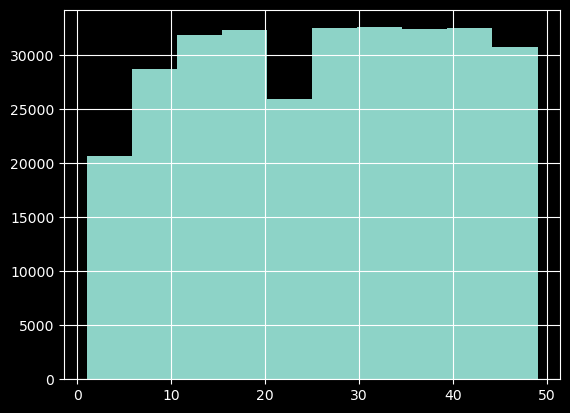

In [14]:
# plot the distribution of column  days_left 
df['days_left'].hist()

<Axes: ylabel='duration'>

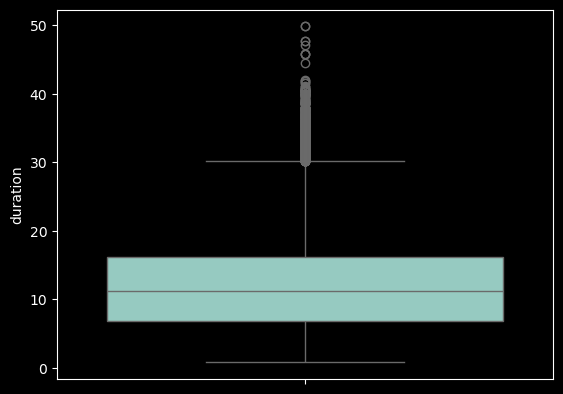

In [15]:
# see the outlier
sns.boxplot(data=df['duration'])

<Axes: ylabel='days_left'>

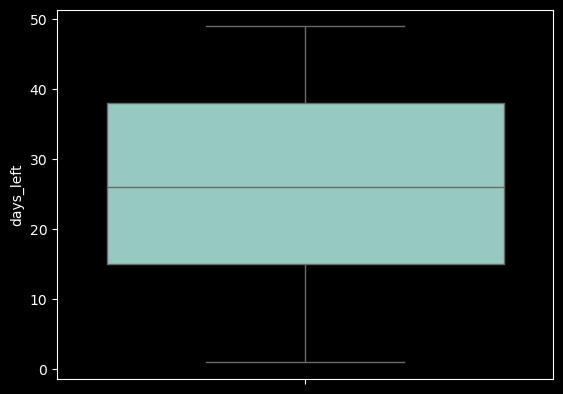

In [16]:
# see the outlier
sns.boxplot(data=df['days_left'])

# work with outlier 

In [17]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1 
    
    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5
    
    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]
    
    return ls

In [18]:
index_list = []
index_list.extend(outliers(df,'duration'))

In [19]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [20]:
df = remove(df,index_list)

In [21]:
df.shape

(298043, 11)

## work with object data 

In [22]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [23]:
airline_count=df['airline'].value_counts().reset_index()
airline_count

,airline,count
0,Vistara,127040
1,Air_India,79601
2,Indigo,43120
3,GO_FIRST,23173
4,AirAsia,16098
5,SpiceJet,9011


In [24]:
fig = px.pie(airline_count, values='count', names='airline',title='Type Of Airlines ')
fig.show()

In [25]:
df['flight'].nunique()

1561

In [26]:
df['source_city'].nunique()

6

In [27]:
source_city_count=df['source_city'].value_counts().reset_index()
source_city_count

,source_city,count
0,Delhi,61183
1,Mumbai,60709
2,Bangalore,51554
3,Kolkata,45881
4,Hyderabad,40638
5,Chennai,38078


In [28]:
fig = px.pie(source_city_count, values='count', names='source_city',title='source_city ')
fig.show()

In [29]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [30]:
departure_time_count=df['departure_time'].value_counts().reset_index()
departure_time_count

,departure_time,count
0,Morning,70416
1,Early_Morning,66212
2,Evening,64990
3,Night,48013
4,Afternoon,47106
5,Late_Night,1306


In [31]:
fig = px.pie(departure_time_count, values='count', names='departure_time',title='departure_time')
fig.show()

In [32]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [33]:
stops_count=df['stops'].value_counts().reset_index()
stops_count

,stops,count
0,one,249573
1,zero,36004
2,two_or_more,12466


In [34]:
fig = px.pie(stops_count, values='count', names='stops',title='types of stops ')
fig.show()

In [35]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [36]:
arrival_time_count=df['arrival_time'].value_counts().reset_index()
arrival_time_count

,arrival_time,count
0,Night,90752
1,Evening,77261
2,Morning,62730
3,Afternoon,37943
4,Early_Morning,15369
5,Late_Night,13988


In [37]:
fig = px.pie(arrival_time_count, values='count', names='arrival_time',title='arrival_time')
fig.show()

In [38]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [39]:
destination_city_count=df['destination_city'].value_counts().reset_index()
destination_city_count

,destination_city,count
0,Mumbai,58686
1,Delhi,57162
2,Bangalore,50712
3,Kolkata,49161
4,Hyderabad,42339
5,Chennai,39983


In [40]:
fig = px.pie(destination_city_count, values='count', names='destination_city',title='destination_city ')
fig.show()

In [41]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [42]:
class_count=df['class'].value_counts().reset_index()
class_count

,class,count
0,Economy,204792
1,Business,93251


In [43]:
fig = px.pie(class_count, values='count', names='class',title='Type Of classes ')
fig.show()

In [44]:
# we will drop 'flight' column becouse it have alot of unique data "1561" and it not necessary 
df.drop('flight',axis=1,inplace=True)

### the object data is clean

## Prepare the data

In [45]:
# Encode  the data 
column=['airline','source_city','departure_time','stops','arrival_time','destination_city','class']

df[column] = df[column].apply(LabelEncoder().fit_transform)



In [46]:
# x and y
x=df.drop(['price'],axis=1)
y=df['price']

In [47]:
# split data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print('x_train size',x_train.shape)
print('y_train size',y_train.shape)
print('x_test size',x_test.shape)
print('y_test size',y_test.shape)

x_train size (223532, 9)
y_train size (223532,)
x_test size (74511, 9)
y_test size (74511,)


## Model

### LinearRegression

In [48]:
lr=LinearRegression()


In [49]:
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
lr.score(x_train,y_train)

0.9048357350487802

In [51]:
lr.score(x_test,y_test)

0.9042400808365508

# crose validation to linear regresion model

In [52]:
# calculate the mean score error to the linear regression model 
scores = cross_val_score(lr,x , y, cv=6, scoring='r2')

print("Cross-Validation Scores:", scores)
print("Mean R^2 Score:", scores.mean())

Cross-Validation Scores: [-0.1699808  -0.22343195 -0.07834206 -0.08690775  0.63187725  0.08268926]
Mean R^2 Score: 0.025983992645857712


# KNN 

In [53]:
# knn object with the hyper parameter n_neighbors=5 , weights="uniform" & metric="manhattan" 
knn = KNN(n_neighbors=5,weights="uniform",metric="manhattan")

In [54]:
# fit the model with x_train & y_train
knn.fit(x_train,y_train)

KNeighborsRegressor(metric='manhattan')

In [55]:
# train score 
knn.score(x_train,y_train)

0.8559763197310482

In [56]:
# test score
knn.score(x_test,y_test)

0.7784895960100826

# XGBoost

### this is an extra model to see the accuracy for this data with different models

In [57]:
#  xgboost object
xgb = XGBRegressor(n_estimators= 2000 , max_depth= 7 , learning_rate = 0.01)


In [58]:
# fit the model
xgb.fit(x_train , y_train);

In [59]:
# print the accuracy of model
print ("train accuracy",xgb.score(x_train , y_train))
print ("test accuracy",xgb.score(x_test , y_test))

train accuracy 0.9789776659675756
test accuracy 0.9771309581220924
